In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
import numpy as np

C:\Users\Akash Dangare\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [25]:
import re

In [26]:
sentences = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program !@# People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells. """

In [27]:
sentences = re.sub(r'[^a-zA-Z0-9]+',' ',sentences)
sentences = re.sub(r'\b\w\b',' ',sentences)
sentences = sentences.lower()
sentences

'we are about to study the idea of   computational process computational processes are abstract beings that inhabit computers as they evolve processes manipulate other abstract things called data the evolution of   process is directed by   pattern of rules called   program people create programs to direct processes in effect we conjure the spirits of the computer with our spells '

In [28]:
words = sentences.split()
vocab = set(words)
# vocab

In [29]:
embed_dim=10
context_size=2
vocab_size=len(vocab)
# vocab_size

In [30]:
words_to_ix = {word : i for i,word in enumerate(vocab)}
ix_to_words = {i : word for i,word in enumerate(vocab)}

In [31]:
data = []

for i in range(2,len(words)-2):
    context = [words[i-2],words[i-1],words[i+1],words[i+2]]
    target = words[i]
    data.append((context,target))
# print(data)

In [32]:
embeddings = np.random.random_sample((vocab_size,embed_dim))
# embeddings

In [33]:
def linear(m,theta):
    w = theta
    return m.dot(w)

In [34]:
def log_softmax(x):
    e_x = np.exp(x-np.max(x))
    return np.log(e_x/e_x.sum())

In [35]:
# negative log likelihood (NLL) loss function
def NLLLoss(logs,targets):
    out = logs[range(len(targets)),targets]
    return -out.sum()/len(out)

In [36]:
def log_softmax_crossentropy_with_logits(logits,target):
    
    out = np.zeros_like(logits)
    out[np.arange(len(logits)),target] = 1
    
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    
    return (-out + softmax) / logits.shape[0]    

In [37]:
def forward(context_idx,theta):
    m = embeddings[context_idx].reshape(1,-1)
    n = linear(m,theta)
    o = log_softmax(n)
    
    return m,n,o

In [38]:
def backward(pred,theta,target_idx):
    m,n,o = pred
    
    dlog = log_softmax_crossentropy_with_logits(n,target_idx)
    dw = m.T.dot(dlog)
    
    return dw

In [39]:
def optimize(theta,grad,lr=0.03):
    
    theta -=grad*lr
    return theta

In [40]:
theta = np.random.uniform(-1,1,(2*embed_dim*context_size,vocab_size))

In [42]:
# print(words)
# context,target = data
# print(data)
epoch_losses = {}

for epoch in range(0,80):
    
    losses = []
    
    for context,target in data:
        context_idx = np.array([words_to_ix[w] for w in context])
        preds = forward(context_idx,theta)
        
        target_idx = np.array([words_to_ix[target]])
        loss = NLLLoss(preds[-1],target_idx)
        
        losses.append(loss)
        
        grad = backward(preds,theta,target_idx)
        opt = optimize(theta,grad,0.03)
        
    epoch_losses[epoch] = losses

Text(0.5, 0, 'epoch')

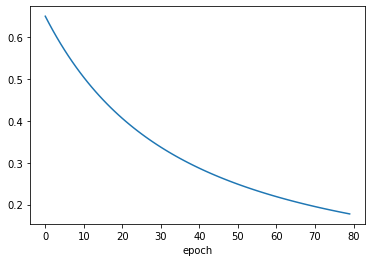

In [43]:
ix = np.arange(0,80)

plt.plot(ix,[epoch_losses[i][0] for i in range(0,80)])
plt.xlabel('epoch')

In [45]:
def predict(context,theta):
    context_idx = np.array([words_to_ix[w] for w in context])
    preds = forward(context_idx,theta)
    
    word = ix_to_words[np.argmax(preds[-1])]
    
    return word

In [46]:
predict(['we', 'are', 'to', 'study'],theta)

'about'

In [47]:
predict(['abstract', 'beings', 'inhabit', 'computers'],theta)

'that'

In [48]:
def evaluateModel():
    
    wrong=0
    
    for context,target in data:
        if(predict(context,theta) != target):
            wrong+=1
    return 1-(wrong/len(data))

In [49]:
evaluateModel()

1.0